In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
gender_count=df.sex.value_counts()

print(gender_count)

sex
1    206
0     96
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

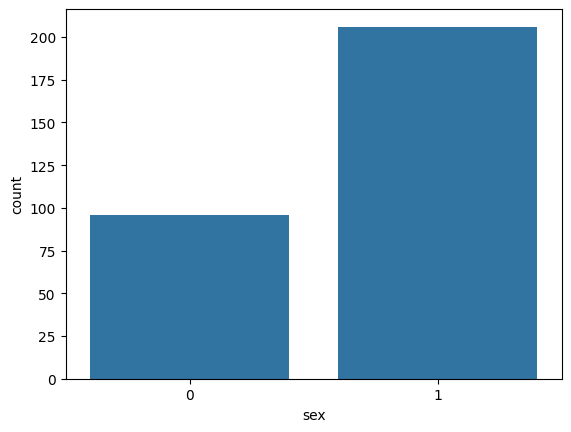

In [8]:
sns.countplot(data=df,x='sex')

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


<Axes: xlabel='cp', ylabel='count'>

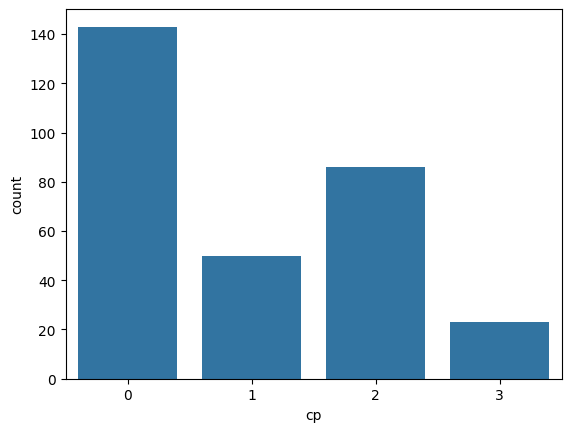

In [9]:
chest_pain=df.cp.value_counts()
print(chest_pain)

sns.countplot(data=df,x='cp')

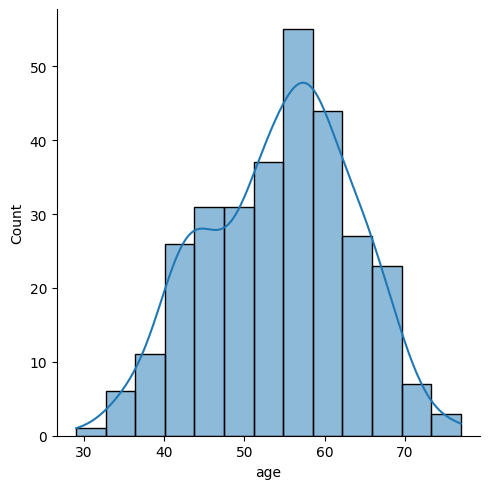

In [10]:
sns.displot(df.age,kde=True,label='age')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16788\2962218232.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output']==0]['age'],kde=True,color='green',)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16788\2962218232.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output']==1][

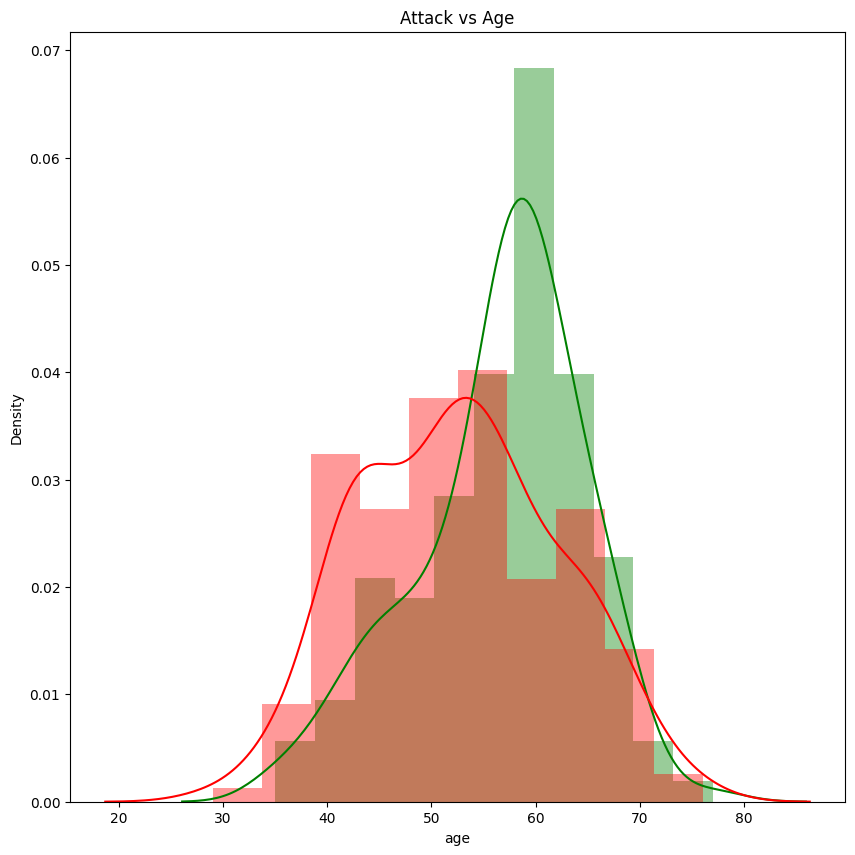

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output']==0]['age'],kde=True,color='green',)
sns.distplot(df[df['output']==1]['age'],kde=True,color='red')
plt.title("Attack vs Age")
plt.show()

In [13]:
y=df.iloc[:,-1].values
X=df.iloc[:,1:-1].values

In [14]:
from sklearn.model_selection import  train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [16]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [18]:
X_train=std.fit_transform(X_train)
X_test=std.fit_transform(X_test)

In [20]:
from sklearn.naive_bayes import  GaussianNB
gnb=GaussianNB()

In [21]:
gnb.fit(X_train,y_train)

GaussianNB()

In [22]:
ypred=gnb.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,ypred)

0.8947368421052632